<a href="https://colab.research.google.com/github/OKJAHR/breast_cancer_classification/blob/main/G%C3%B6g%C3%BCs_Kanseri_S%C4%B1n%C4%B1fland%C4%B1rmas%C4%B1_%5BYSA%5D_201505045.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Kütüphaneleri Çağırdık
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Verimizi yükleyip çağırdık
data = pd.read_csv('/content/Breast.csv')
del data['Unnamed: 32']

In [ ]:
# Veri ön işleme 
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Kategorik verileri değiştirme
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Veri setini Eğitim seti ve Test seti olarak ayırma
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
# Yapay Sinir AĞları
from tensorflow.keras.layers import BatchNormalization

ysa =Sequential()

ysa.add(Dense(units = 30,activation = 'relu'))
ysa.add(BatchNormalization())
ysa.add(Dropout(0.5))

ysa.add(Dense(units = 30,activation = 'relu'))
ysa.add(BatchNormalization())
ysa.add(Dropout(0.5))


ysa.add(Dense(units = 1,activation = 'sigmoid'))


In [ ]:
ysa.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


model=ysa.fit(X_train, y_train,batch_size = 32, validation_data=(X_test, y_test),epochs =100,callbacks = [early_stop])

Epoch 1/100
16/16 [==============================] - 2s 26ms/step - loss: 0.9513 - accuracy: 0.5234 - val_loss: 0.6048 - val_accuracy: 0.7719
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6699 - accuracy: 0.6641 - val_loss: 0.4804 - val_accuracy: 0.8421
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.4897 - accuracy: 0.7773 - val_loss: 0.3944 - val_accuracy: 0.8596
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4070 - accuracy: 0.8281 - val_loss: 0.3265 - val_accuracy: 0.8947
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.8613 - val_loss: 0.2754 - val_accuracy: 0.8947
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3479 - accuracy: 0.8711 - val_loss: 0.2355 - val_accuracy: 0.9123
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.2901 - accuracy: 0.8809 - val_loss: 0.2082 - val_accuracy: 0.9123
Epoch 8/100


In [ ]:
ysa.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 30)                930       
                                                                 
 batch_normalization_2 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_8 (Dense)             (None, 30)                930       
                                                                 
 batch_normalization_3 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 30)               

<Axes: >

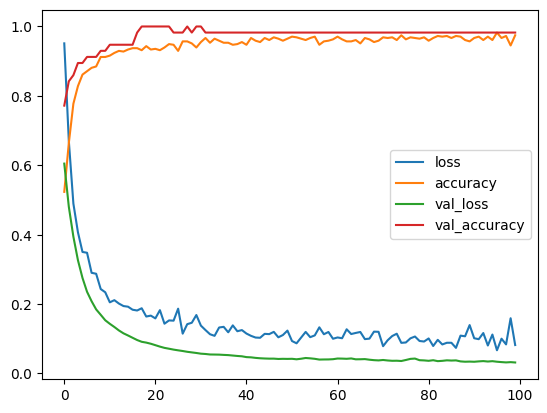

In [ ]:
history = pd.DataFrame(ysa.history.history)
history.plot()

In [ ]:
y_pred = ysa.predict(X_test)
#DEğerleri döüştürme
y_pred = (y_pred>0.5)

2/2 [==============================] - 0s 6ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.96      1.00      0.98        22

    accuracy                           0.98        57
   macro avg       0.98      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
print(cm)
print('score is:',score)

[[34  1]
 [ 0 22]]
score is: 0.9824561403508771


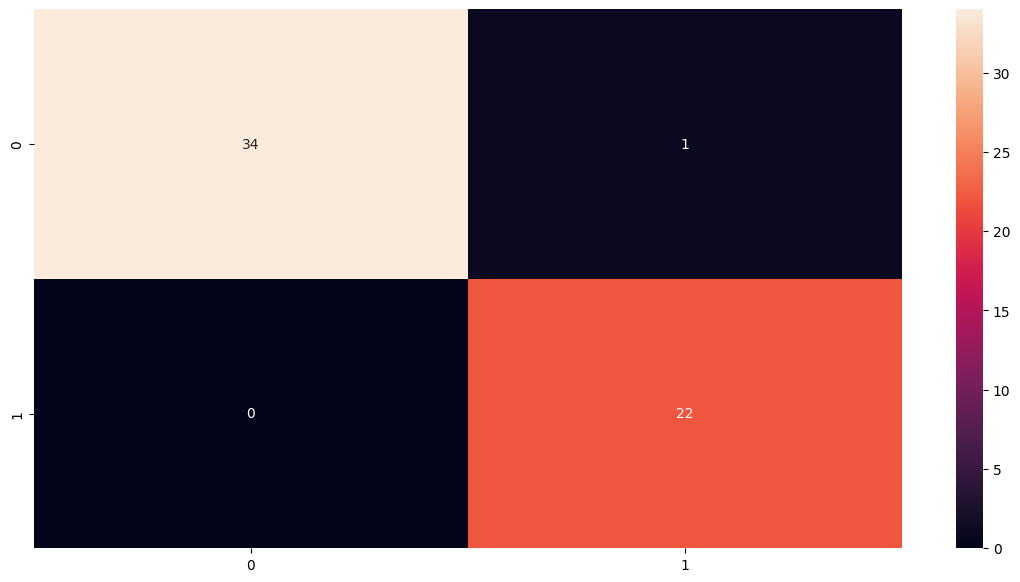

In [ ]:
# Kofsyo matrisii oluşturulması
plt.figure(figsize=[14,7])
sns.heatmap(cm,ysaot=True)
plt.show()